# Blatt 7

In [15]:
import tensorflow as tf
from pandas.core.common import random_state
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
print(tf.__version__)

2.20.0


## Nr.1
### a)

In [17]:
df = pd.read_csv("Input/herford_weather.csv")

selected_columns = [
    "temperature_2m (°C)",
    "relativehumidity_2m (%)",
    "dewpoint_2m (°C)",
    "apparent_temperature (°C)",
    "pressure_msl (hPa)",
    "surface_pressure (hPa)",
    "precipitation (mm)",
    "rain (mm)",
    "snowfall (cm)",
    "weathercode (wmo code)",
    "cloudcover (%)",
    "cloudcover_low (%)",
    "cloudcover_mid (%)",
    "cloudcover_high (%)",
    "shortwave_radiation (W/m²)",
    "direct_radiation (W/m²)",
    "diffuse_radiation (W/m²)",
    "direct_normal_irradiance (W/m²)",
    "windspeed_10m (km/h)",
    "windspeed_100m (km/h)",
    "winddirection_10m (°)",
    "winddirection_100m (°)",
    "windgusts_10m (km/h)",
    "et0_fao_evapotranspiration (mm)",
    "vapor_pressure_deficit (kPa)",
    "soil_temperature_0_to_7cm (°C)",
    "soil_temperature_7_to_28cm (°C)",
    "soil_temperature_28_to_100cm (°C)",
    "soil_temperature_100_to_255cm (°C)",
    "soil_moisture_0_to_7cm (m³/m³)",
    "soil_moisture_7_to_28cm (m³/m³)",
    "soil_moisture_28_to_100cm (m³/m³)",
    "soil_moisture_100_to_255cm (m³/m³)"
]

df_sel = df[selected_columns]
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,1996-01-01T00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1,1996-01-01T01:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
2,1996-01-01T02:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
3,1996-01-01T03:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
4,1996-01-01T04:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


### Heatmap

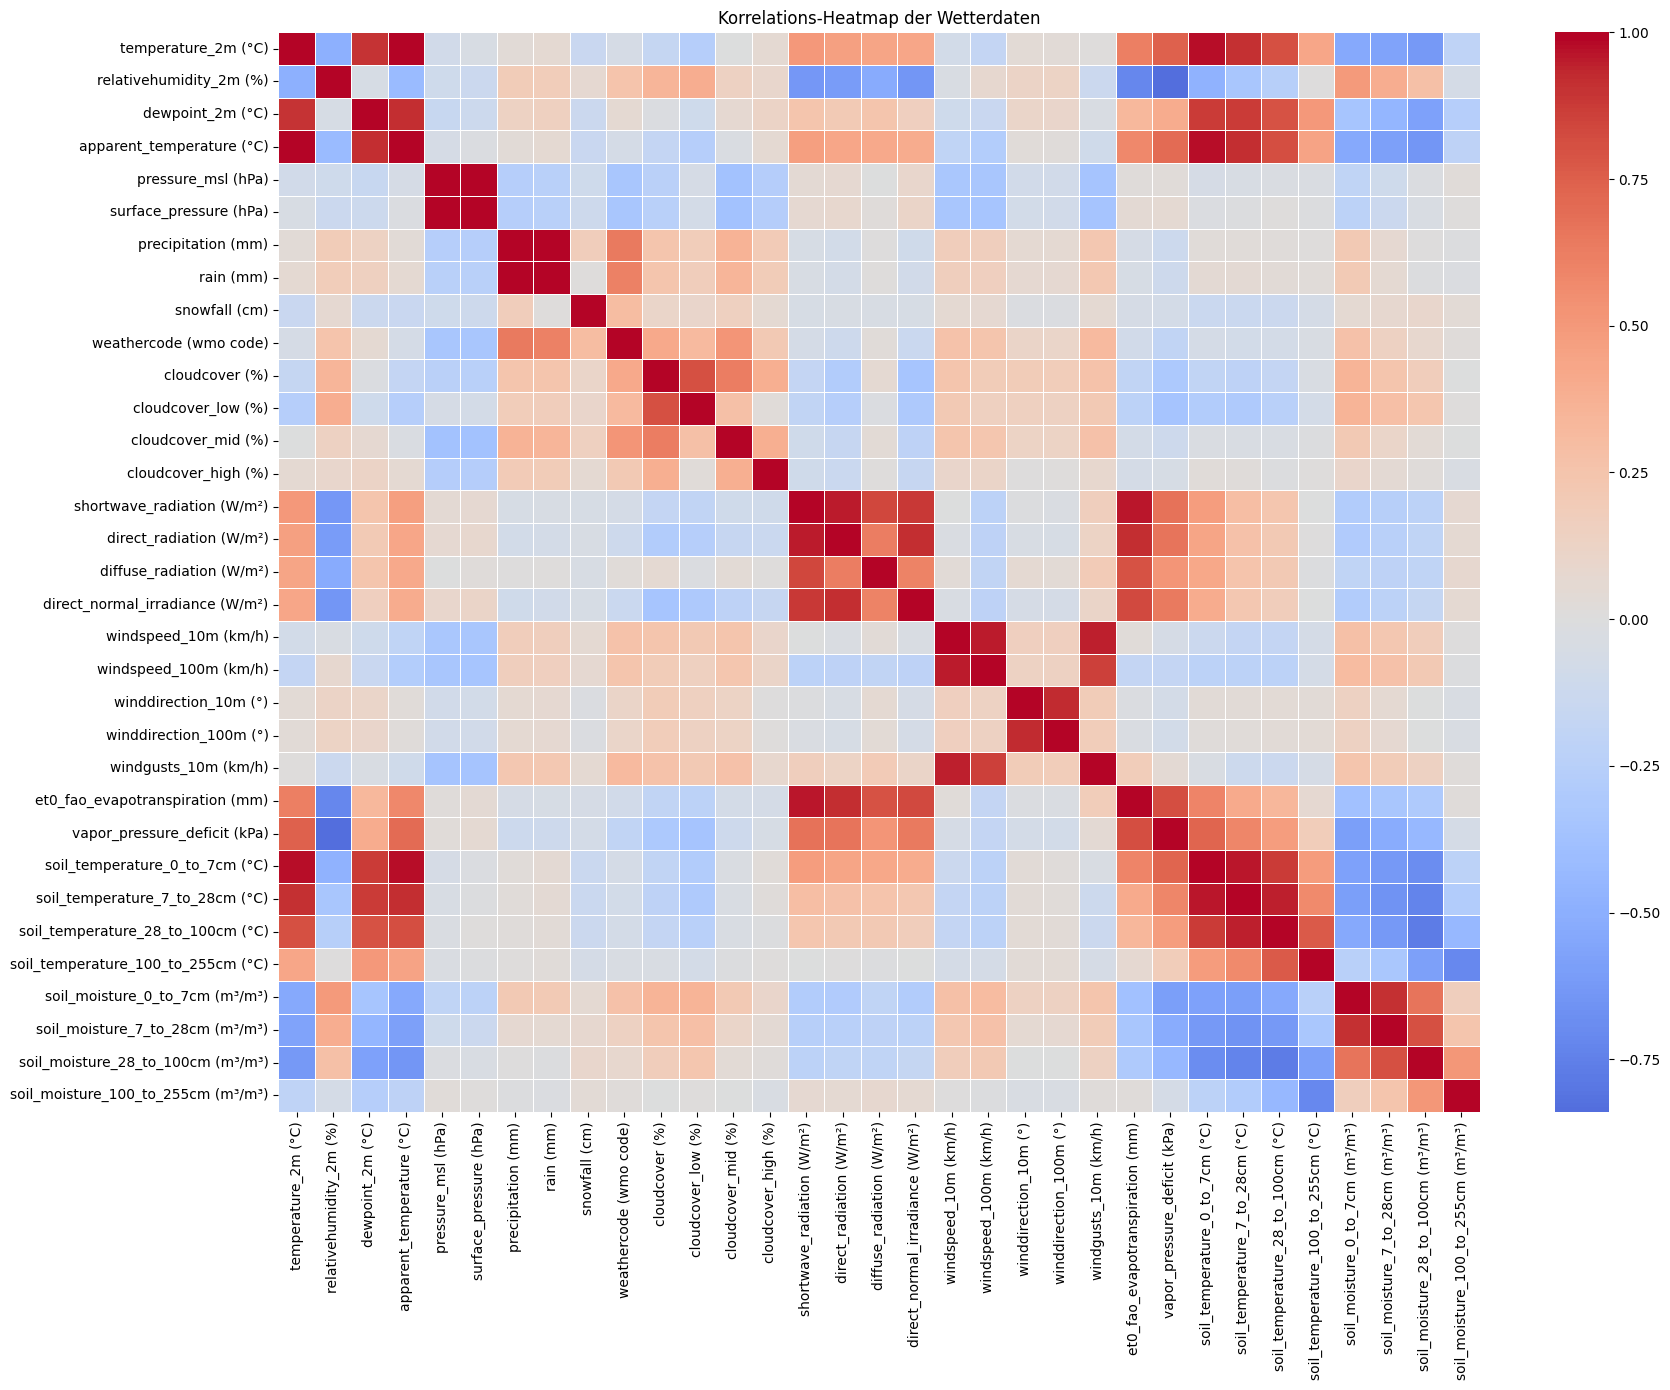

In [18]:
corr_matrix = df_sel.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Korrelations-Heatmap der Wetterdaten")
plt.tight_layout()
plt.show()

### Scattermatrix

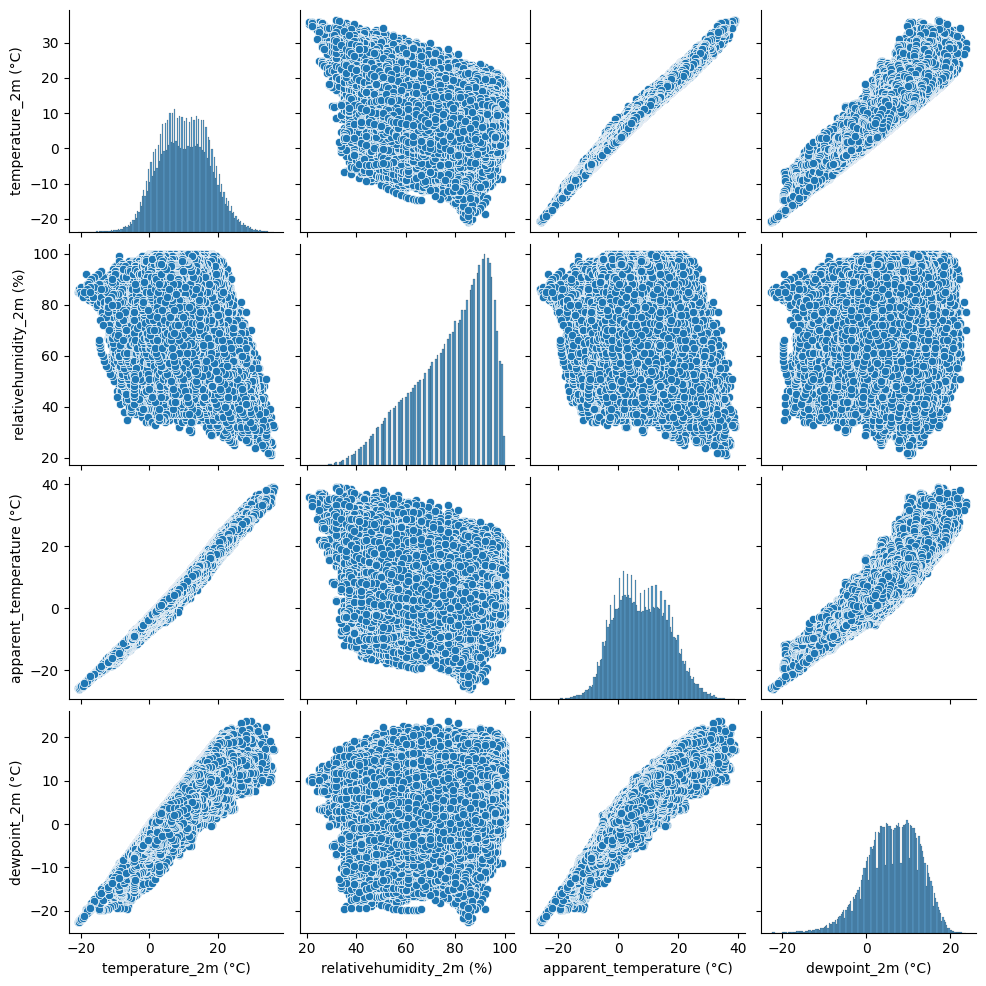

In [30]:


features = [
    "temperature_2m (°C)",
    "relativehumidity_2m (%)",
    "apparent_temperature (°C)",
    "dewpoint_2m (°C)",
]

sns.pairplot(df[features])
plt.show()


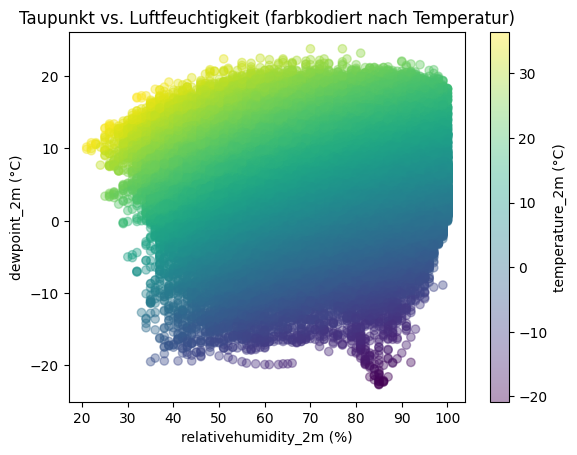

In [29]:
plt.scatter(
    df["relativehumidity_2m (%)"],
    df["dewpoint_2m (°C)"],
    c=df["temperature_2m (°C)"],
    cmap="viridis",
    alpha=0.4
)
plt.colorbar(label="temperature_2m (°C)")
plt.xlabel("relativehumidity_2m (%)")
plt.ylabel("dewpoint_2m (°C)")
plt.title("Taupunkt vs. Luftfeuchtigkeit (farbkodiert nach Temperatur)")
plt.show()


### b)

In [46]:
# Imports

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import random

np.random.seed(23)
tf.random.set_seed(23)
random.seed(23)

# Features und Zielvariable

features = [
    "temperature_2m (°C)",
    "relativehumidity_2m (%)"
]

X = df[features].values
y = df["dewpoint_2m (°C)"].values


# Train / Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=23
)


# StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Keras Modell (Lineare Regression)

model = keras.Sequential([
    keras.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(1)
])

# Kompilieren

model.compile(
    optimizer="adam",
    loss="mse"
)


# Trainieren

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=2,
)


Epoch 1/5
2396/2396 - 5s - 2ms/step - loss: 53.2391 - val_loss: 34.2278
Epoch 2/5
2396/2396 - 4s - 2ms/step - loss: 21.4973 - val_loss: 11.4198
Epoch 3/5
2396/2396 - 5s - 2ms/step - loss: 5.7220 - val_loss: 1.9258
Epoch 4/5
2396/2396 - 4s - 2ms/step - loss: 0.7675 - val_loss: 0.2834
Epoch 5/5
2396/2396 - 7s - 3ms/step - loss: 0.2673 - val_loss: 0.2537


### d)

In [53]:
from sklearn.metrics import r2_score

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test_scaled)

# R-Quadrat berechnen
r2 = r2_score(y_test, y_pred)

print("R² auf Testdaten:", r2)


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step
R² auf Testdaten: -0.004714716404025543


### e)

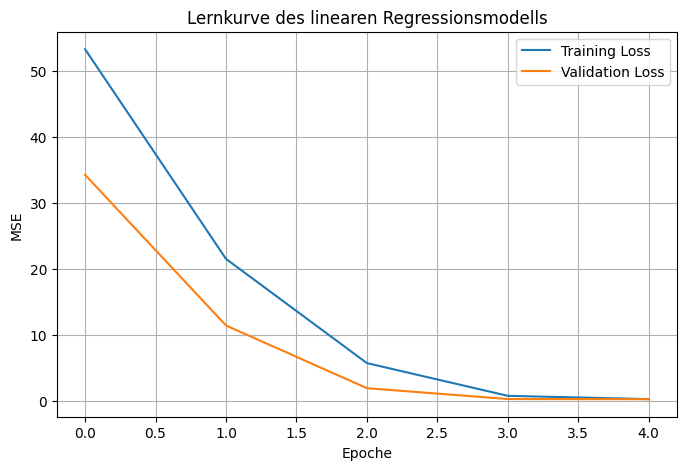

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.xlabel("Epoche")
plt.ylabel("MSE")
plt.title("Lernkurve des linearen Regressionsmodells")
plt.legend()
plt.grid(True)

plt.show()


### f)


Epoch 1/5
2396/2396 - 5s - 2ms/step - loss: 0.0101 - val_loss: 0.0029
Epoch 2/5
2396/2396 - 5s - 2ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 3/5
2396/2396 - 5s - 2ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/5
2396/2396 - 4s - 2ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/5
2396/2396 - 4s - 2ms/step - loss: 0.0011 - val_loss: 0.0013
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
R² für Schneefall (Testdaten): -0.004714716404025543


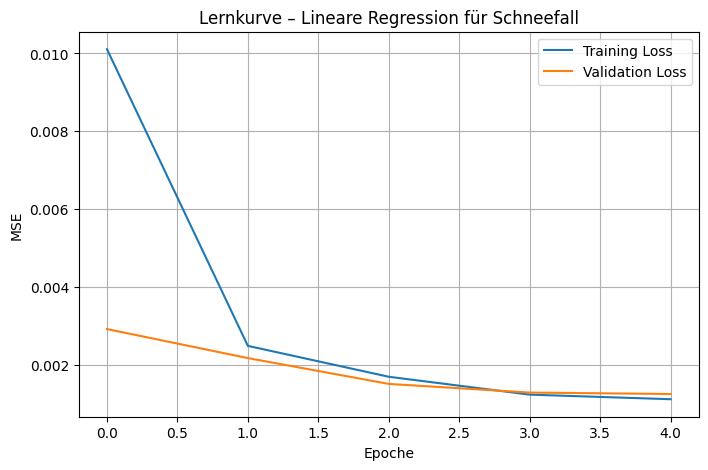

In [52]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt


# Reproduzierbarkeit

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


# Daten laden

df = pd.read_csv("Input/herford_weather.csv")


# Features und Zielvariable (snowfall)

features = [
    "temperature_2m (°C)",
    "relativehumidity_2m (%)",
    "dewpoint_2m (°C)"
]

X = df[features].values
y = df["snowfall (cm)"].values


# Train / Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


# StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Keras Modell (Lineare Regression)

model = keras.Sequential([
    keras.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(1)
])


# Kompilieren

model.compile(
    optimizer="adam",
    loss="mse"
)


# Trainieren

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)


# R² auf Testdaten

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print("R² für Schneefall (Testdaten):", r2)


# Lernkurve plotten

plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoche")
plt.ylabel("MSE")
plt.title("Lernkurve – Lineare Regression für Schneefall")
plt.legend()
plt.grid(True)
plt.show()
